In [41]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [42]:
x = sym.symbols('x')
f_expr = 3*x**3-10*x**2-56*x+50
f_prime = f_expr.diff(x)
f_double_prime = f_prime.diff(x)

In [43]:
def NR(x0):
    x_lista = []
    i = 1
    xi = x0
    a = 1
    conv = 0.001
    while abs(f_prime.subs(x, xi)) > conv:
        xi1 = xi - a*(f_prime.subs(x, xi)/f_double_prime.subs(x, xi))
        x_lista.append(xi1)
        xi = xi1
    return xi

In [44]:
x0 = 0
x1 = 2
inflexion0 = NR(x0)
inflexion1 = NR(x1)

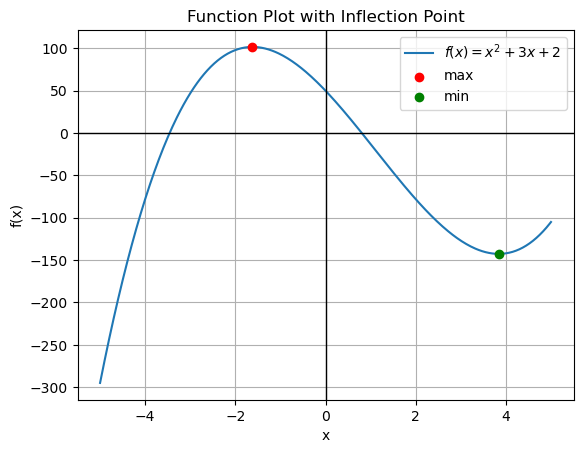

In [45]:
# Convert the symbolic function to a numerical function
f_numeric = sym.lambdify(x, f_expr, 'numpy')

# Generate x values for plotting
x_vals = np.linspace(-5, 5, 400)
y_vals = f_numeric(x_vals)

# Plot the function
plt.plot(x_vals, y_vals, label=r'$f(x) = x^2 + 3x + 2$')

# Plot the inflection point
inflexion_x0 = float(inflexion0)
inflexion_x1 = float(inflexion1)
inflexion_y0 = f_numeric(inflexion_x0)
inflexion_y1 = f_numeric(inflexion_x1)

plt.scatter(inflexion_x0, inflexion_y0, color='red', zorder=5, label='max')
plt.scatter(inflexion_x1, inflexion_y1, color='green', zorder=5, label='min')

# Customize the plot
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function Plot with Inflection Point')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()